# Walkability in Los Angeles
## For this assignment, I will explore a shapefile containing walkability index scores for each census tract in the City of Los Angeles. My goals are to better understand this dataset and create an easily digestible map that shows which areas of Los Angeles are the most and least walkable.

First we import the libraries and data that we will need for this exploration.

In [1]:
import pandas as pd
import geopandas as gpd
walkability = gpd.read_file('Walkability_Index_Score_2012.zip')
walkability

ERROR 1: PROJ: proj_create_from_database: Open of /opt/conda/share/proj failed


,OBJECTID,TOT_SQFT,GEOID10,GEOID10_1,LU_Diversi,LUDiv_Z,Intersecti,Inter_Z,Ret_Den,Ret_Z,Res_Den,Res_Z,Walkabilit,Walkabil_1,geometry
0,1,61700812,06037106510,06037106510,0.286888,-0.969699,38.860580,-1.787499,0.322552,-0.437202,28.712246,-0.158316,-3.352716,-5.140215,"POLYGON ((-118.46372 34.31840, -118.46483 34.3..."
1,2,22445154,06037106406,06037106406,0.453006,0.161020,142.846933,-0.622632,0.360047,-0.422248,7.836378,-0.404323,-1.288183,-1.910814,"POLYGON ((-118.45968 34.33003, -118.45965 34.3..."
2,3,27135797,06037106010,06037106010,0.415851,-0.091883,96.579907,-1.140921,0.000000,-0.565847,3.828881,-0.451548,-2.250198,-3.391119,"POLYGON ((-118.45968 34.33003, -118.45821 34.3..."
3,4,21722443,06037106020,06037106020,0.234912,-1.323478,118.079095,-0.900084,0.000000,-0.565847,4.573557,-0.442773,-3.232182,-4.132266,"POLYGON ((-118.41913 34.32319, -118.42037 34.3..."
4,5,41192667,06037106111,06037106111,0.401389,-0.190325,81.435488,-1.310570,0.000000,-0.565847,4.172580,-0.447498,-2.514240,-3.824810,"POLYGON ((-118.41913 34.32319, -118.41739 34.3..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
998,999,6142199,06037134710,06037134710,0.489382,0.408615,190.638219,-0.087268,0.336718,-0.431552,17.759705,-0.287384,-0.397589,-0.484857,"POLYGON ((-118.57976 34.20832, -118.57883 34.2..."
999,1000,35642332,06037111204,06037111204,0.254480,-1.190286,138.566970,-0.670576,0.000000,-0.565847,3.680128,-0.453301,-2.880011,-3.550587,"POLYGON ((-118.54673 34.27400, -118.54655 34.2..."
1000,1001,39545057,06037113102,06037113102,0.317425,-0.761840,90.953134,-1.203952,0.240255,-0.470025,1.936319,-0.473851,-2.909668,-4.113621,"POLYGON ((-118.56968 34.27334, -118.56830 34.2..."
1001,1002,19229823,06037113322,06037113322,0.340570,-0.604300,146.112611,-0.586049,0.210475,-0.481902,4.287649,-0.446142,-2.118393,-2.704443,"POLYGON ((-118.57983 34.25726, -118.57766 34.2..."


We use .shape to find that the original dataset has 1003 rows and 15 columns.

In [2]:
walkability.shape

(1003, 15)

We use .info to get additional information about the data frame.

In [3]:
walkability.info

<bound method DataFrame.info of       OBJECTID  TOT_SQFT      GEOID10    GEOID10_1  LU_Diversi   LUDiv_Z  \
0            1  61700812  06037106510  06037106510    0.286888 -0.969699   
1            2  22445154  06037106406  06037106406    0.453006  0.161020   
2            3  27135797  06037106010  06037106010    0.415851 -0.091883   
3            4  21722443  06037106020  06037106020    0.234912 -1.323478   
4            5  41192667  06037106111  06037106111    0.401389 -0.190325   
...        ...       ...          ...          ...         ...       ...   
998        999   6142199  06037134710  06037134710    0.489382  0.408615   
999       1000  35642332  06037111204  06037111204    0.254480 -1.190286   
1000      1001  39545057  06037113102  06037113102    0.317425 -0.761840   
1001      1002  19229823  06037113322  06037113322    0.340570 -0.604300   
1002      1003  24429933  06037113301  06037113301    0.485641  0.383155   

      Intersecti   Inter_Z   Ret_Den     Ret_Z    Res_D

This dataset contains several variables related to walkability that have been combined into an index. For this assignment, I am going to explore just the final walkability index number. I would prefer to work with a "clean" dataset with just the columns that I need. First, I must look at all of the columns to pick the ones that I want. 

In [4]:
walkability.dtypes

OBJECTID         int64
TOT_SQFT         int64
GEOID10         object
GEOID10_1       object
LU_Diversi     float64
LUDiv_Z        float64
Intersecti     float64
Inter_Z        float64
Ret_Den        float64
Ret_Z          float64
Res_Den        float64
Res_Z          float64
Walkabilit     float64
Walkabil_1     float64
geometry      geometry
dtype: object

Now, I will create a new dataframe called "walkability_trimmed" with just a unique identifier for each census tract, its walkability score, and its geographical info. This dataframe will be used for all subsequent analysis.

In [5]:
walkability_trimmed = walkability[['OBJECTID', 'Walkabil_1', 'geometry']].copy()
walkability_trimmed

,OBJECTID,Walkabil_1,geometry
0,1,-5.140215,"POLYGON ((-118.46372 34.31840, -118.46483 34.3..."
1,2,-1.910814,"POLYGON ((-118.45968 34.33003, -118.45965 34.3..."
2,3,-3.391119,"POLYGON ((-118.45968 34.33003, -118.45821 34.3..."
3,4,-4.132266,"POLYGON ((-118.41913 34.32319, -118.42037 34.3..."
4,5,-3.824810,"POLYGON ((-118.41913 34.32319, -118.41739 34.3..."
...,...,...,...
998,999,-0.484857,"POLYGON ((-118.57976 34.20832, -118.57883 34.2..."
999,1000,-3.550587,"POLYGON ((-118.54673 34.27400, -118.54655 34.2..."
1000,1001,-4.113621,"POLYGON ((-118.56968 34.27334, -118.56830 34.2..."
1001,1002,-2.704443,"POLYGON ((-118.57983 34.25726, -118.57766 34.2..."


I will rename these columns so that they are easier to work with.

In [6]:
walkability_trimmed.columns = ['index', 'walkability', 'geometry']
walkability_trimmed

,index,walkability,geometry
0,1,-5.140215,"POLYGON ((-118.46372 34.31840, -118.46483 34.3..."
1,2,-1.910814,"POLYGON ((-118.45968 34.33003, -118.45965 34.3..."
2,3,-3.391119,"POLYGON ((-118.45968 34.33003, -118.45821 34.3..."
3,4,-4.132266,"POLYGON ((-118.41913 34.32319, -118.42037 34.3..."
4,5,-3.824810,"POLYGON ((-118.41913 34.32319, -118.41739 34.3..."
...,...,...,...
998,999,-0.484857,"POLYGON ((-118.57976 34.20832, -118.57883 34.2..."
999,1000,-3.550587,"POLYGON ((-118.54673 34.27400, -118.54655 34.2..."
1000,1001,-4.113621,"POLYGON ((-118.56968 34.27334, -118.56830 34.2..."
1001,1002,-2.704443,"POLYGON ((-118.57983 34.25726, -118.57766 34.2..."


My main goal is to create a map that colors census tracts based on their walkability. To explore the walkability index values in the dataframe and identify appropriate buckets for mapping, I will create a dataframe with just walkability data. 

In [7]:
walkability_scores = walkability_trimmed[['walkability']].copy()
walkability_scores

,walkability
0,-5.140215
1,-1.910814
2,-3.391119
3,-4.132266
4,-3.824810
...,...
998,-0.484857
999,-3.550587
1000,-4.113621
1001,-2.704443


I want create 6 even groups with about ~167 census tracts each to map areas based on their walkability. To identify the appropriate walkability cutoffs for these groups, I I had to figure out how to use two new functions. First I sorted the data and then I re-indexed it so that I could find the walkability values associated with the appropriate ranks.

In [8]:
walkability_sorted = walkability_scores.sort_values(by='walkability')
walkability_sorted = walkability_sorted.reset_index()

I will use .head and .tail to visually inspect the data and check that it has been sorted and indexed properly.

In [9]:
walkability_sorted.head(10)

,index,walkability
0,961,-22.537971
1,100,-7.351123
2,7,-7.329747
3,22,-7.123441
4,81,-6.952755
5,38,-6.774925
6,964,-6.697435
7,346,-6.427707
8,934,-6.268889
9,348,-6.231057


In [10]:
walkability_sorted.tail(10)

,index,walkability
993,657,9.745416
994,547,9.867428
995,816,9.868389
996,819,10.591760
997,550,10.829442
998,731,12.057587
999,540,14.937668
1000,616,19.426176
1001,545,20.323191
1002,619,26.713504


Now that the data is sorted in rank order, I can find the cutoff numbers by printing the elements at the appropriate positions within the data frame. 

In [11]:
cutoffs = [walkability_sorted.loc[0], walkability_sorted.loc[167],walkability_sorted.loc[334],
           walkability_sorted.loc[501],walkability_sorted.loc[668],walkability_sorted.loc[835],
           walkability_sorted.loc[1002]]
cutoffs

[index          961.000000
 walkability    -22.537971
 Name: 0, dtype: float64,
 index          49.000000
 walkability    -2.698366
 Name: 167, dtype: float64,
 index          270.000000
 walkability     -1.512343
 Name: 334, dtype: float64,
 index          697.000000
 walkability     -0.441309
 Name: 501, dtype: float64,
 index          107.000000
 walkability      0.694902
 Name: 668, dtype: float64,
 index          338.000000
 walkability      2.571449
 Name: 835, dtype: float64,
 index          619.000000
 walkability     26.713504
 Name: 1002, dtype: float64]

I will create a new column called "category" to store this new information.

In [12]:
walkability_trimmed['category']=''
walkability_trimmed

,index,walkability,geometry,category
0,1,-5.140215,"POLYGON ((-118.46372 34.31840, -118.46483 34.3...",
1,2,-1.910814,"POLYGON ((-118.45968 34.33003, -118.45965 34.3...",
2,3,-3.391119,"POLYGON ((-118.45968 34.33003, -118.45821 34.3...",
3,4,-4.132266,"POLYGON ((-118.41913 34.32319, -118.42037 34.3...",
4,5,-3.824810,"POLYGON ((-118.41913 34.32319, -118.41739 34.3...",
...,...,...,...,...
998,999,-0.484857,"POLYGON ((-118.57976 34.20832, -118.57883 34.2...",
999,1000,-3.550587,"POLYGON ((-118.54673 34.27400, -118.54655 34.2...",
1000,1001,-4.113621,"POLYGON ((-118.56968 34.27334, -118.56830 34.2...",
1001,1002,-2.704443,"POLYGON ((-118.57983 34.25726, -118.57766 34.2...",


I will now assign each census tract to the approrpriate category based on its walkability index. 
To do this, we will first set each census tract to being marked as "Very High". We will then filter the dataset to exclude all census tracts that deserve this high score (e.g. all census tracts with a walkability index below 2.57) and mark these as the next category down (e.g. "Moderately High). We will continue with this filtering and marking process until all census tracts have been appropriately categorized. The values came from the exercise performed above. These values have been named (after some trial and error!) so that they are alphabetically ordered from least to most walkable and the strings can function as ordinal variables.

In [13]:
walkability_trimmed['category'] = '6: Very High'
walkability_trimmed.loc[walkability_trimmed['walkability'] < 2.571449 , 'category'] = '5: Moderately High'
walkability_trimmed.loc[walkability_trimmed['walkability'] < 0.694902 , 'category'] = '4: Somewhat High'
walkability_trimmed.loc[walkability_trimmed['walkability'] < -0.441309 , 'category'] = '3: Somewhat Low'
walkability_trimmed.loc[walkability_trimmed['walkability'] < -1.512343 , 'category'] = '2: Moderately Low'
walkability_trimmed.loc[walkability_trimmed['walkability'] < -2.698366 , 'category'] = '1: Very Low'
walkability_trimmed.sample(25)

,index,walkability,geometry,category
807,808,0.038105,"POLYGON ((-118.43790 33.99493, -118.43719 33.9...",4: Somewhat High
876,877,-0.307006,"POLYGON ((-118.25593 33.95653, -118.25593 33.9...",4: Somewhat High
956,957,-5.690521,"POLYGON ((-118.45550 34.07585, -118.45467 34.0...",1: Very Low
118,119,-1.998650,"POLYGON ((-118.45356 34.22810, -118.45356 34.2...",2: Moderately Low
179,180,0.095223,"POLYGON ((-118.40944 34.20393, -118.40792 34.2...",4: Somewhat High
376,377,4.549821,"POLYGON ((-118.19374 34.11888, -118.19387 34.1...",6: Very High
487,488,9.165205,"POLYGON ((-118.28682 34.07634, -118.28682 34.0...",6: Very High
47,48,-3.423002,"POLYGON ((-118.44328 34.26662, -118.44311 34.2...",1: Very Low
175,176,-2.273660,"POLYGON ((-118.37906 34.20845, -118.37688 34.2...",2: Moderately Low
438,439,-4.260376,"POLYGON ((-118.24384 34.09562, -118.24372 34.0...",1: Very Low


I am going to use .value_counts() to ensure that these buckets are evenly sized.

In [14]:
walkability_trimmed['category'].value_counts()

6: Very High          168
1: Very Low           167
2: Moderately Low     167
3: Somewhat Low       167
4: Somewhat High      167
5: Moderately High    167
Name: category, dtype: int64

Success! Now I can create a plot of each census tract that is color-coded based on these categories.

<AxesSubplot: >

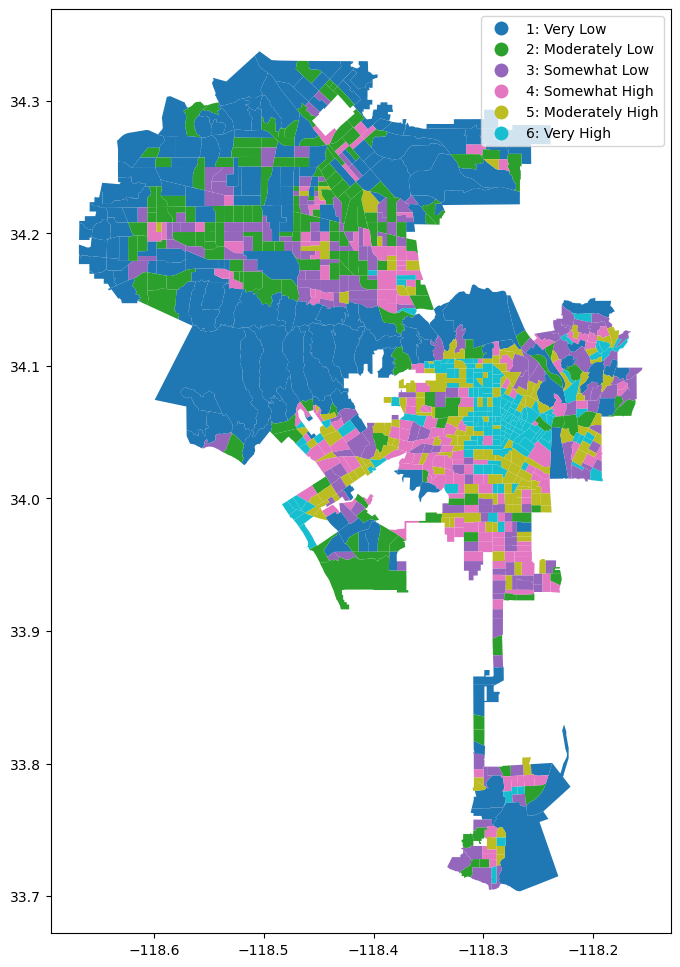

In [15]:
walkability_trimmed.plot(
            figsize=(20,12),   
            column = 'category',
            legend = True,
            legend_kwds={
               'loc': 'upper right',
               'bbox_to_anchor':(1,1)
            }
) 

I want these colors to be more intuitive, so I looked into "color maps" in Python. The following plot uses a diverging color scheme that can be more easily visually interpreted.

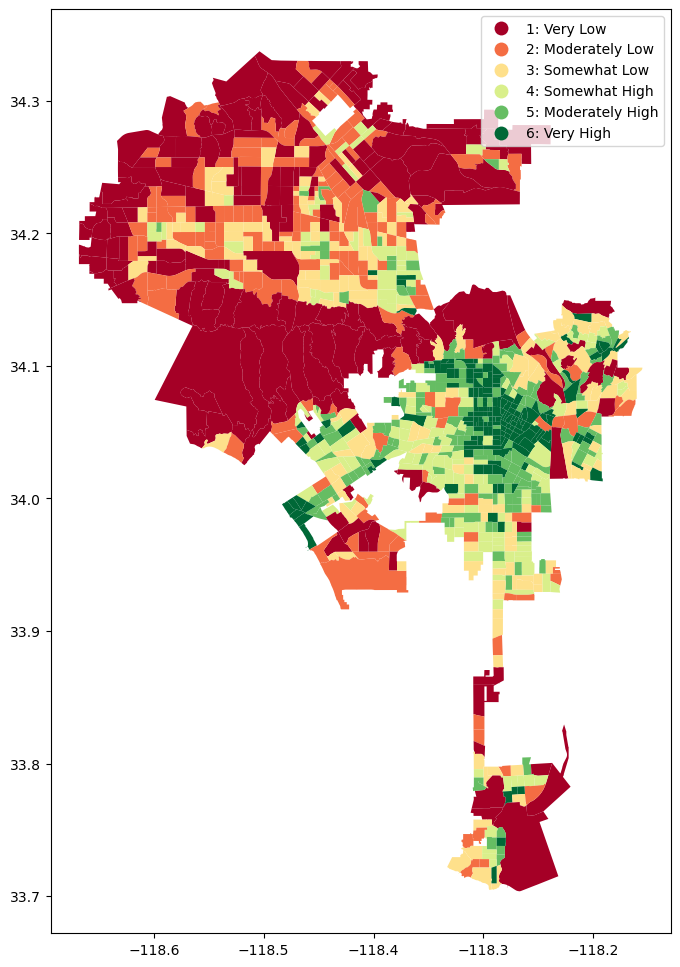

In [16]:
plt = walkability_trimmed.plot(
            figsize=(20,12),   
            column = 'category',
            cmap= 'RdYlGn', 
            legend = True,
            legend_kwds={
               'loc': 'upper right',
               'bbox_to_anchor':(1,1)
            }
) 

From this plot we can now easily identify the most walkable areas of Los Angeles (primarily near Downtown and Venice Beach).